<a href="https://colab.research.google.com/github/vikkimaps/BibliometricAnalysis/blob/main/Lab3/Lab3_WranglingStats_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3
## Data Wrangling and Visualisation

Welcome to the Week 3 lab for GEOG5302 Data Science for Practical Applications! In this session, we will be continuing on from last week, applying our understanding of statistics and getting started on some data wrangling and visualisation. You might need to refer to your notes from the first couple of weeks for a few of the questions. <br>
This week, as per standard Python practice, we begin by loading the packages we'll need, which is pandas again this week. We'll also use two different visualisation packages (pyplot and seaborn), so we'll load these in here, too.

In [1]:
import pandas as pd #importing pandas
pd.options.mode.chained_assignment = None #this just turns off some error messages we don't need
import matplotlib.pyplot as plt #import matplotlib's pyplot interface, and give it the nickname plt
import seaborn as sns #for some smarter visualisations, nicknamed sns

This week were working with some new data, which describes the proportions of different land usea and populations across Local Authorities in England. This data is provided in three separate `.csv` files, so we'll need to load them in separately and join them together.
<br><br>
__Note:__ In these labs we're mostly going to be working with .csv data using Pandas. Other data formats (e.g. Excel) can be imported easily, the documentation for these tools can be found [here.](http://pandas.pydata.org/pandas-docs/stable/io.html)
<br><br>
First we load in the 'LandUse_England' dataset and call it 'LandUse'

In [2]:
LandUse = pd.read_csv('LandUse_England.csv') #load in the data

To check it's loaded correctly, we'll just view the top few rows. Complete the code below (see week 1's lab if you need a hint!)

In [3]:
LandUse.head() #view the top few rows

,LAD22CD,LAD22NM,LAs_London,Community_Buildings,Defence,Commerce,Landfill,Mining,Residential,Transport,Utilities,Unknown_development,Agriculture,Forests,Natural,Grassland,Water,Recreation,Gardens,Vacant
0,E92000001,England,NaN,0.7,0,0.4,0,0.1,1.3,4.2,0.2,1.9,63.1,10.7,4.9,3.4,1.1,2.1,4.9,0.2
1,E12000004,East Midlands,NaN,0.6,0,0.3,0,0.2,1.0,3.8,0.2,1.9,73.5,7.3,1.9,1.3,1.3,1.7,4.1,0.2
2,E12000006,East of England,NaN,0.7,0,0.3,0,0,1.1,4.0,0.2,1.7,72.3,8.7,0.9,0.9,1.4,2.0,4.9,0.2
3,E12000007,London,NaN,4.9,0,2.1,0,0,10.7,16.3,0.3,6.3,10.3,5.4,0.1,0.7,1.2,13.9,24.0,0.7
4,E12000001,North East,NaN,0.6,0,0.4,0,0.1,1.0,3.5,0.1,1.5,48.3,13.9,15.4,8.9,0.9,1.6,2.7,0.2


To list all the columns, we can use the the `info()` command. Try it out below.

In [4]:
LandUse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LAD22CD              319 non-null    object 
 1   LAD22NM              319 non-null    object 
 2   LAs_London           309 non-null    object 
 3   Community_Buildings  319 non-null    float64
 4   Defence              319 non-null    object 
 5   Commerce             319 non-null    float64
 6   Landfill             319 non-null    object 
 7   Mining               319 non-null    object 
 8   Residential          319 non-null    float64
 9   Transport            319 non-null    float64
 10  Utilities            319 non-null    float64
 11  Unknown_development  319 non-null    float64
 12  Agriculture          319 non-null    object 
 13  Forests              319 non-null    float64
 14  Natural              319 non-null    object 
 15  Grassland            319 non-null    obj

## Introduction Data Wrangling
We'll start this lab by exploring our data sets, and dealing with a few of the common problems we see in data analytics. We'll use statistics and visualisations to help us do this.

<br><br><br>
## Not a Number

Something doesn't look quite right with the strings
appearing in our LAs_London Column, which tells us whether or not the local area is in London. Call the column again and have a look at the top 15 rows:

In [5]:
#call the top 15 rows
LandUse['LAs_London'].head(15)

,LAs_London
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


`NaN` stands for 'Not a Number', meaning there is missing data in this row. Call up the whole data frame below and think about why this might be.

In [6]:
#call the dataframe
LandUse

,LAD22CD,LAD22NM,LAs_London,Community_Buildings,Defence,Commerce,Landfill,Mining,Residential,Transport,Utilities,Unknown_development,Agriculture,Forests,Natural,Grassland,Water,Recreation,Gardens,Vacant
0,E92000001,England,NaN,0.7,0,0.4,0,0.1,1.3,4.2,0.2,1.9,63.1,10.7,4.9,3.4,1.1,2.1,4.9,0.2
1,E12000004,East Midlands,NaN,0.6,0,0.3,0,0.2,1.0,3.8,0.2,1.9,73.5,7.3,1.9,1.3,1.3,1.7,4.1,0.2
2,E12000006,East of England,NaN,0.7,0,0.3,0,0,1.1,4.0,0.2,1.7,72.3,8.7,0.9,0.9,1.4,2.0,4.9,0.2
3,E12000007,London,NaN,4.9,0,2.1,0,0,10.7,16.3,0.3,6.3,10.3,5.4,0.1,0.7,1.2,13.9,24.0,0.7
4,E12000001,North East,NaN,0.6,0,0.4,0,0.1,1.0,3.5,0.1,1.5,48.3,13.9,15.4,8.9,0.9,1.6,2.7,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,E07000229,Worthing,Not_London,3.8,0,1.3,-,0,10.2,13.5,0.3,4.9,16.3,5.1,0.8,0.7,0.1,10.5,29.9,0.2
315,E07000238,Wychavon,Not_London,0.4,-,0.2,0.1,0,0.8,3.7,0.2,2.0,76.4,7.9,0.1,0.8,1.1,1.1,4.4,0.1
316,E07000128,Wyre,Not_London,1.1,0,0.3,0.1,0,1.5,4.0,0.2,2.4,66.2,4.8,8.3,1.7,1.5,1.4,5.3,0.3
317,E07000239,Wyre Forest,Not_London,0.9,0,0.5,0,0,1.7,4.6,0.0,2.3,56.6,18.4,0.3,1.2,1.3,2.7,8.1,0.1


You might notice that these Local Areas aren't actually Local Area's at all, but averages for increasing geographical areas. This means that some rows don't have the relevant data if we just want to know whether or not a local area is in London. This other area information might be really useful for comparing data, we don't need it for our analyses of the indidivual Local Areas. To select just the affected rows, we can use location indexing (`iloc`) to call up rows and columns (`dataframeiloc[[rows], [columns]]` and use a comma to separate the different rows in a list:

In [7]:
LandUse.iloc[[0,1,2,3,4,5,6,7,8,9],:]

,LAD22CD,LAD22NM,LAs_London,Community_Buildings,Defence,Commerce,Landfill,Mining,Residential,Transport,Utilities,Unknown_development,Agriculture,Forests,Natural,Grassland,Water,Recreation,Gardens,Vacant
0,E92000001,England,NaN,0.7,0,0.4,0,0.1,1.3,4.2,0.2,1.9,63.1,10.7,4.9,3.4,1.1,2.1,4.9,0.2
1,E12000004,East Midlands,NaN,0.6,0,0.3,0,0.2,1.0,3.8,0.2,1.9,73.5,7.3,1.9,1.3,1.3,1.7,4.1,0.2
2,E12000006,East of England,NaN,0.7,0,0.3,0,0,1.1,4.0,0.2,1.7,72.3,8.7,0.9,0.9,1.4,2.0,4.9,0.2
3,E12000007,London,NaN,4.9,0,2.1,0,0,10.7,16.3,0.3,6.3,10.3,5.4,0.1,0.7,1.2,13.9,24.0,0.7
4,E12000001,North East,NaN,0.6,0,0.4,0,0.1,1.0,3.5,0.1,1.5,48.3,13.9,15.4,8.9,0.9,1.6,2.7,0.2
5,E12000002,North West,NaN,0.9,0,0.5,0,0.1,1.5,4.5,0.1,2.2,48.4,9.4,13.7,8.7,1.6,2.4,4.9,0.2
6,E12000008,South East,NaN,1.0,0,0.4,0,0,1.5,4.8,0.2,2.0,58.6,16.7,1.1,1.2,1.2,3.1,7.1,0.2
7,E12000009,South West,NaN,0.4,0,0.2,0,0,0.8,3.6,0.2,1.6,68.6,11.4,3.2,3.4,0.8,1.2,3.7,0.1
8,E12000005,West Midlands,NaN,0.8,0,0.4,0,0,1.3,4.3,0.1,2.2,68.9,10.1,0.6,1.2,1.1,2.2,5.5,0.2
9,E12000003,Yorkshire and The Humber,NaN,0.6,0,0.4,0,0.1,1.0,3.9,0.1,1.8,60.7,8.4,10.3,5.3,1.0,1.6,3.8,0.1


We don't need these rows for our current analyses, so we can make a new data frame, omitting these rows. We can use a technique called _slicing_. We want to keep just rows 10-318. The command is `dataframe[start_row : end_row]`. Leaving either side of the colon blank means you'll go with the default start and end of the data set.
Update the code below, adding the first row (row 10) that we want to keep, before the colon:
<br>
__Note:__ (annoyingly) this only works for rows in data frames, not columns, but it suits our purposed here just fine.

In [8]:
#LandUseEng = LandUse[:].copy()
LandUseEng = LandUse[10:].copy() #this returns all rows up to, but not including 33.

If we want to choose a different end point, we put this after the colon. Let's have a look at our new data frame!

In [9]:
#call your new dataframe here
LandUseEng

,LAD22CD,LAD22NM,LAs_London,Community_Buildings,Defence,Commerce,Landfill,Mining,Residential,Transport,Utilities,Unknown_development,Agriculture,Forests,Natural,Grassland,Water,Recreation,Gardens,Vacant
10,E07000223,Adur,Not_London,3.2,-,0.8,0,-,4.5,10.8,0.2,2.9,50.7,4.0,1.5,2.2,0.8,3.1,13.4,0.4
11,E07000026,Allerdale,Not_London,0.2,0,0.1,0,0,0.3,2.3,0.1,1.0,55.2,7.1,20.3,8.2,2.0,1.5,1.3,0.1
12,E07000032,Amber Valley,Not_London,0.8,0,0.6,0,-,1.6,4.2,0.1,2.8,66.5,9.8,0.2,0.8,0.8,3.4,7.1,0.3
13,E07000224,Arun,Not_London,0.8,-,0.4,0,0.1,2.6,5.7,0.4,2.9,55.2,16.3,0.6,0.7,0.7,2.0,9.6,0.4
14,E07000170,Ashfield,Not_London,1.9,0,1.7,0.1,0,3.4,7.1,0.4,3.9,42.8,14.0,0,1.3,0.5,7.5,12.5,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,E07000229,Worthing,Not_London,3.8,0,1.3,-,0,10.2,13.5,0.3,4.9,16.3,5.1,0.8,0.7,0.1,10.5,29.9,0.2
315,E07000238,Wychavon,Not_London,0.4,-,0.2,0.1,0,0.8,3.7,0.2,2.0,76.4,7.9,0.1,0.8,1.1,1.1,4.4,0.1
316,E07000128,Wyre,Not_London,1.1,0,0.3,0.1,0,1.5,4.0,0.2,2.4,66.2,4.8,8.3,1.7,1.5,1.4,5.3,0.3
317,E07000239,Wyre Forest,Not_London,0.9,0,0.5,0,0,1.7,4.6,0.0,2.3,56.6,18.4,0.3,1.2,1.3,2.7,8.1,0.1


We now only have data for the relevant Local Areas, but we've kept the original data set separate, in case we need to fall back on it. This is good practice when working with different parts of data.

<br><br><br>
## Plotting with pyplot and seaborn
Now we've made sure the data covers the area we'd expect, we can start to create some basic plots. One of the simplest is a histogram, which we had a little look at in week 1.

We'll start by using the `pyplot` package to examine the different types of 'natural' land use. Pyplot is a more basic plotting package for Python. It's quite quick and easy to use, and gives you some control over the design of your plot.

First, we'll create a histogram of the proportion of forests in each local area. We can make a basic histogram using just the `.hist()` command:

<Axes: >

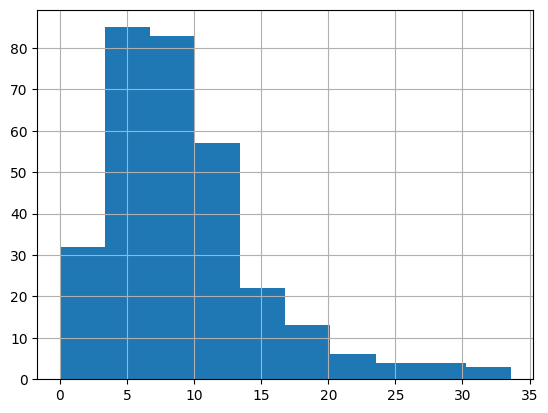

In [10]:
LandUseEng['Forests'].hist()

Pretty easy, right? There are a few things we can change to personalise our plot. For example, the number of bins (bars) on a plot. Can you figure out how to specify 100 bins, by adding `bins = ` in the brackets?

<Axes: >

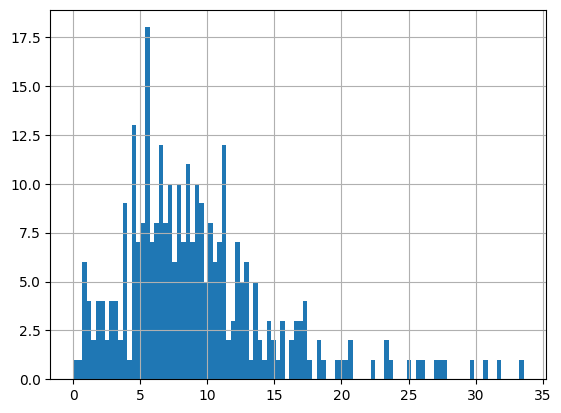

In [11]:
#create a histogram with 100 bins
LandUseEng['Forests'].hist(bins = 100)

We can also change the colours, by adding the `color` option to the brackets. Can you figure out how to make your histogram red?

<Axes: >

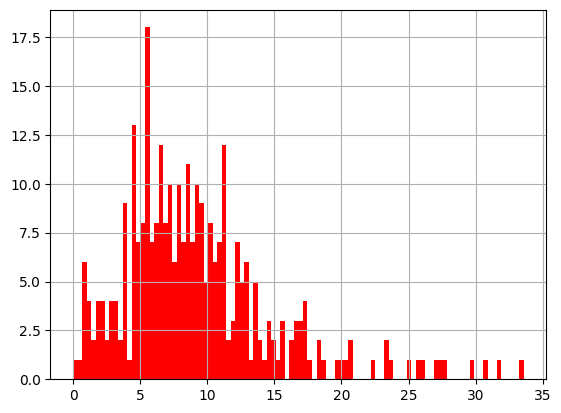

In [12]:
LandUseEng['Forests'].hist(bins = 100, color = 'red')

More colour options for pyplot can be found [here](https://matplotlib.org/stable/gallery/color/named_colors.html).

But often one of the easiest ways to personalise our plots is to use the `seaborn` package, which is often used to produce cleaner and more professional looking plots. These can have a bit more editting flexibility, as the package does more behind the scenes. We're practicing both methods this week, but really you can mostly stick with what feels most comfortable to you.

The command below will create a histogram. Note that, this time, all the information for the plot goes within the brackets- including the data.

<Axes: xlabel='Forests', ylabel='Count'>

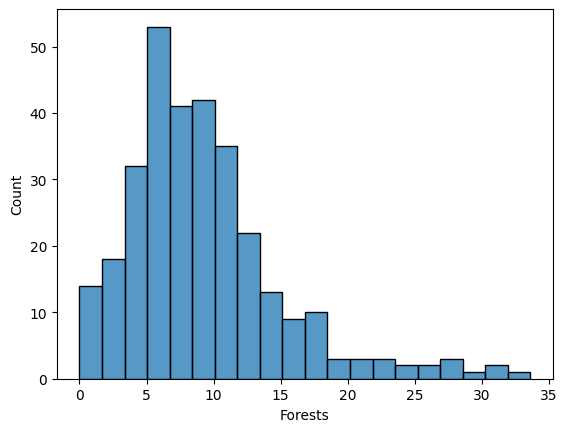

In [13]:
sns.histplot(LandUseEng['Forests'])

Notice that `seaborn` automatically does some helpful things, like adding axis labels. However, the `Forests` column actually refers to the _percentage_ of forests in each area, so we can update our axis labels to reflect this.

The format for customising aspects of our plots can use the best of seaborn and pyplot functions. We start by creating a new `fig` (figure), telling python which plot to create (using either `plt` or `sns`), and then using `plt` commands to add additional elements.

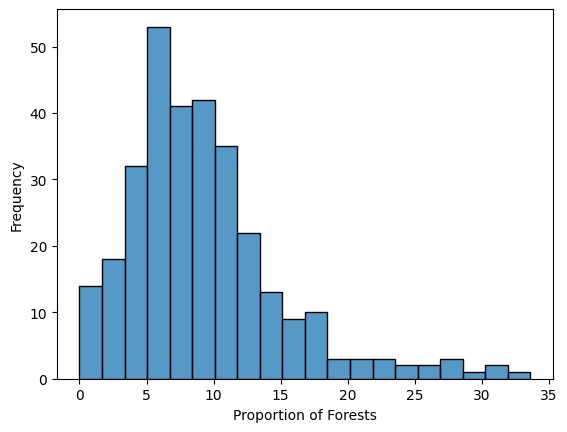

In [14]:
fig = sns.histplot(LandUseEng['Forests']) #create the figure
plt.xlabel('Proportion of Forests') #update the x label
plt.ylabel('Frequency') #add a y label
plt.show() #show the plot- and remove any additional information that we don't need

Can you figure out how to add one more line to add a title to the plot, before running `show`? [This](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html) function documentation may help if you get stuck.

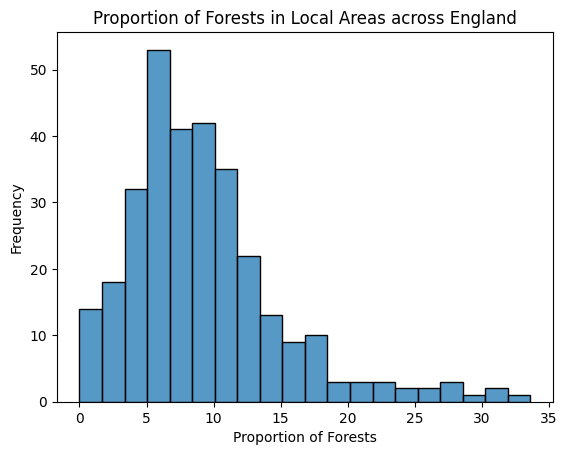

In [15]:
#create your histogram with a title here
fig = sns.histplot(LandUseEng['Forests']) #create the figure
plt.xlabel('Proportion of Forests') #update the x label
plt.ylabel('Frequency') #add a y label
plt.title('Proportion of Forests in Local Areas across England') #add a title
plt.show() #show the plot- and remove any additional information that we don't need

As before, we can update the number of bins on our plot,by just adding the `bins` command to our function. Create a seaborn histogram with 100 bins below:

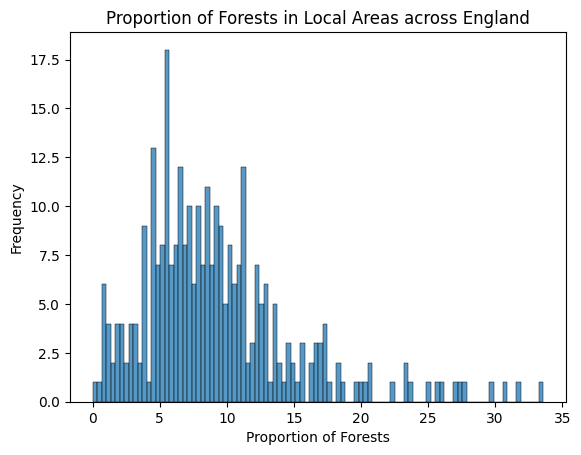

In [16]:
fig = sns.histplot(LandUseEng['Forests'], bins = 100 ) #create the figure with 100 bins
plt.xlabel('Proportion of Forests')
plt.ylabel('Frequency')
plt.title('Proportion of Forests in Local Areas across England')
plt.show()

Seaborn also allows us to do some cool things like break up our bars according to a second variable. Here we'll use the LAs_London variable, which tells us whether a Local Authority is in London or not. We'll tell seaborn to use a different `hue` (colour) according to this variable

<Axes: xlabel='Forests', ylabel='Count'>

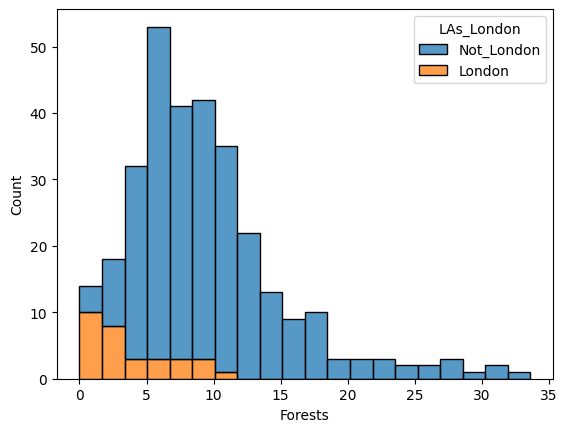

In [17]:
sns.histplot(LandUseEng, x = "Forests", hue = 'LAs_London', multiple ='stack')
#hue specifies the second variable, and multiple shows the colours should be stacked

We can also plot the bars next to each other. Can you figure out how to do this using the information [here](https://seaborn.pydata.org/tutorial/distributions.html)?

<Axes: xlabel='Forests', ylabel='Count'>

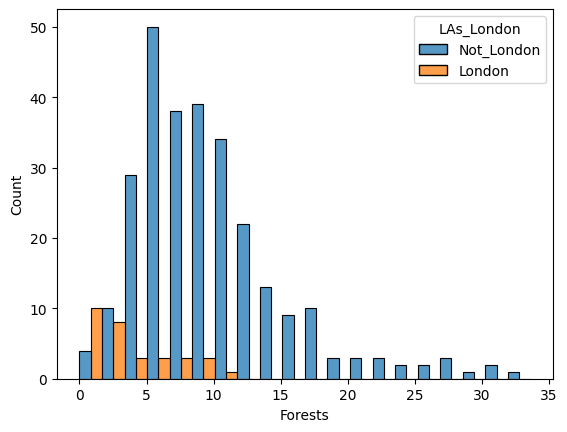

In [18]:
sns.histplot(LandUseEng, x = "Forests", hue = 'LAs_London',multiple ='dodge')

<br><br><br>
## Joining Data
To get more insight on our data, we can add extra variables by joining up data sets, provided they share a common variable. You should be able to see from the data that all the data frames include the same 'Code' field, Pandas will use this to combine the data.
<br>
We'll start simple, by just joining one column, which includes deprivation (IMD) data for each Borough (read more on the deprivation measures [here](https://www.gov.uk/government/statistics/english-indices-of-deprivation-2019).)<br>
Read in the IMD .csv file and call it imd.

<br> <br><br>
## Identifying outliers
Outliers are a common problem in data, and can be caused by a number of things: input error, problems with measuring equipment, incorrect calcualtions, or sometimes just data that happens to be much higher or lower than our 'normal range'.

A word of warning- there are some outliers in the Water column, which tells us the percentage of each local area comprising bodies of water (lakes, rivers, etc)! Let's have a look at statistics to figure out where it is. Last week we used the `.describe()` function to find out information on all variables.

In [19]:
LandUseEng['Water'].describe()

,Water
count,309.000000
mean,2.203560
std,11.637287
min,0.000000
25%,0.700000
50%,1.000000
75%,1.600000
max,150.000000


Can you spot anything that doesn't look quite right? Have a look at the maximum and minimum values.  Remember these are percentages of a total- so should be less than 100!

It can be helpful to viusalise this distibution to check it makes sense. Histograms can be great for this, but creating a box plot also allows us to identify points that fall outside of the interquartile range. We'll start with a simple box plot of our `water` variable, to see if we can figure out what's going on

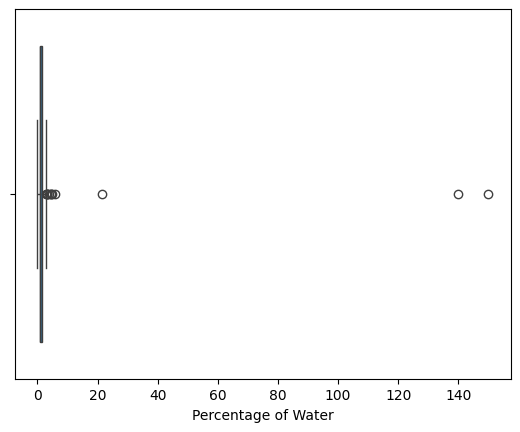

In [20]:
fig = sns.boxplot(data = LandUseEng, x = "Water")
plt.xlabel("Percentage of Water")

plt.show()

You should now be able to see very clearly that we have two valies way outside the range of the other data points, which are all closer to 10. Can you figure out what's gone wrong here?

As a percentage, it looks like the decimal point has been typed in the wrong place- which is an easy mistake to make when entering data by hand. We can move this by assigning the correct value at the right location. Let's check the actual maximum value:
__Hint:__ We did this in week 1!

In [21]:
#check the maximum value
LandUseEng['Water'].max()

150.0

As the value should be a percentage, we can assume that anything greater than 100 is an error. To check what the correct value might be, we can check the mean.

In [22]:
LandUseEng['Water'].mean()

2.203559870550162

As the mean is just over 2%, we can assume that our correct value should be 1.5 (rather than 15).
We can use a quick function to divide any value greater than 100 by 100, to bring them in line with the other values. We can use `.loc` to identify where the value is > 100.

In [23]:
LandUseEng.loc[LandUseEng['Water'] > 100]

,LAD22CD,LAD22NM,LAs_London,Community_Buildings,Defence,Commerce,Landfill,Mining,Residential,Transport,Utilities,Unknown_development,Agriculture,Forests,Natural,Grassland,Water,Recreation,Gardens,Vacant
153,E08000035,Leeds,Not_London,2.1,0,1.3,0.1,0.1,3.5,9.2,0.1,4.0,44.1,10.1,0.5,1,150.0,6.4,12.1,0.4
287,E08000036,Wakefield,Not_London,1.7,0,1.4,0,0,2.9,7.7,0.6,4.3,51.2,8.5,0.2,1.2,140.0,6.2,10.3,0.3


It's good practice to assign the cleaned values to a new variable, so we don't interfere with the original data. We start by copying the column(s) we want to work with to a new variable.  Notice earlier we used the `.iloc` function, whereas now we're using `.loc`. This is because `loc` works with a column _name_, while `iloc` works with a column _index_. Don't worry about this too much, if you use the wrong one, Python will give you a helpful error message!

In [25]:
LandUseEng.loc[:,'Water_Clean'] = LandUseEng.loc[:, 'Water']

We now edit our outliers. In this case, with the decimal being too far to the right, we can simply divide the value greater than 100 by 10, to correct the error.

In [30]:
LandUseEng.loc[LandUseEng['Water']>100, 'Water_Clean'] = LandUseEng['Water']/100

We can check it's worked by recalculating our `.describe()`, this time using the new Water_Clean variable. Try this out below:

In [31]:
LandUseEng['Water_Clean'].describe()

,Water_Clean
count,309.000000
mean,1.274434
std,1.412017
min,0.000000
25%,0.700000
50%,1.000000
75%,1.500000
max,21.600000


This looks good- now we can rebuild our box plot to see how our corrected distribution looks:

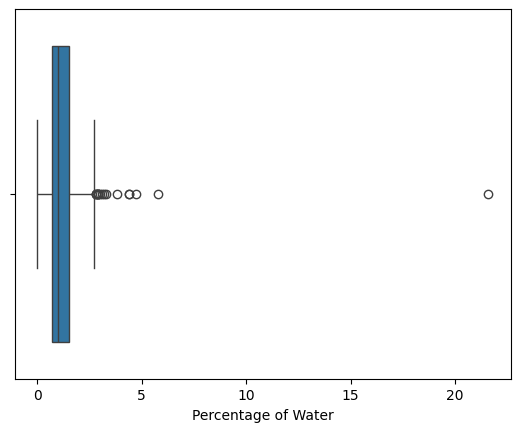

In [32]:
#create a box plot using the Cleaned Water variable
fig = sns.boxplot(data = LandUseEng, x = "Water_Clean")
plt.xlabel("Percentage of Water")

plt.show()

We can now customise our plot. We can easily rotate the plot by changing the x variable to a y variable, try it out. Remember you'll need to change the labels, too!

In [ ]:
#your vertical box plot here

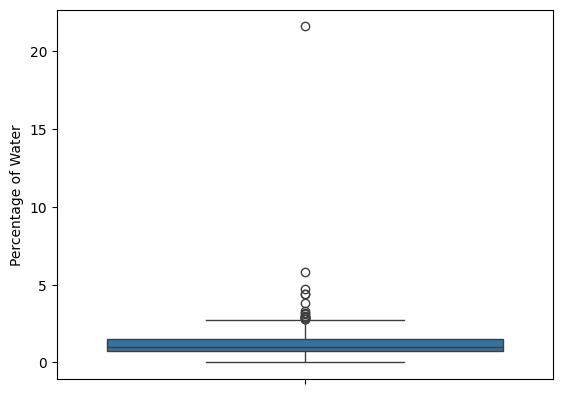

In [34]:
fig = sns.boxplot(data = LandUseEng, y = "Water_Clean")
plt.ylabel("Percentage of Water")

plt.show()